<a href="https://colab.research.google.com/github/REICHIYAN/REI/blob/master/StandardDeviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


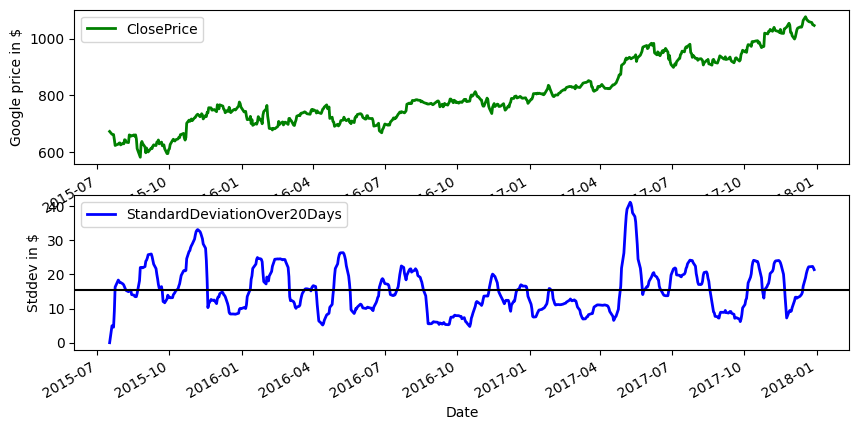

In [1]:
import pandas as pd

from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']


import statistics as stats
import math as math

time_period = 20 # look back period
history = [] # history of prices
sma_values = [] # to track moving average values for visualization purposes
stddev_values = [] # history of computed stdev values

for close_price in close:
  history.append(close_price)
  if len(history) > time_period: # we track at most 'time_period' number of prices
    del (history[0])

  sma = stats.mean(history)
  sma_values.append(sma)
  variance = 0 # variance is square of standard deviation
  for hist_price in history:
    variance = variance + ((hist_price - sma) ** 2)

  stdev = math.sqrt(variance / len(history))

  stddev_values.append(stdev)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
stddev = goog_data['StandardDeviationOver20Days']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5),dpi=100)
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)
ax2.axhline(y=stats.mean(stddev_values), color='k')
plt.show()